# IBMQ tutorial

This notebook will show you how to use pytket to run circuits on the IBMQ backends.
You will need to install `pytket-qiskit` (which will install `qiskit` and `pytket`) as dependencies.

This tutorial assumes you are familiar with creating circuits in `pytket`. The examples will show you:
- [Basic Aer usage](#Basic-Aer-usage)
- [Aer with a noise model](#Aer-with-a-noise-model)
- [Using a real device](#Using-a-real-device)
- [Using Aer with Myqos](#Using-Aer-with-Myqos)
- [Using a real device with Myqos](#Using-a-real-device-with-Myqos)

More thorough documentation can be found:
- On the [IBMQ documentation](https://quantum-computing.ibm.com/docs/)
- On the [qiskit tutorials website](https://qiskit.org/documentation/tutorials.html)
- On the [pytket-qiskit documentation](https://cqcl.github.io/pytket-qiskit/api/index.html)

### Import the necessary packages

In [2]:
from pytket import Circuit  # For creating circuits
from pytket.extensions.qiskit import AerBackend, IBMQBackend  # For interacting with IBMQ

from qiskit_ibm_runtime import QiskitRuntimeService  # For logging in

If it's your first time using Qiskit, you will need to save your credentials using the `QiskitRuntimeService` package -- this is where you need your _API token_. You shouldn't need this for future uses. (You can add `overwrite=True` if necessary.)

In [3]:
from pytket.extensions.qiskit import set_ibmq_config

set_ibmq_config(ibmq_api_token='YOUR TOKEN HERE', hub='partner-cqc', group='internal', project='qnlp')

In [ ]:
# View the available devices 
backend=IBMQBackend
backend.available_devices(hub='YOUR_HUB', group='YOUR_GROUP', project='YOUR_PROJECT')

In [ ]:
QiskitRuntimeService.save_account(channel='ibm_quantum', token='YOUR_TOKEN_HERE')

## Create a circuit

In [4]:
c = Circuit(2).H(0).CX(0, 1).measure_all()
from pytket.circuit.display import render_circuit_jupyter as rcj

rcj(c)

## Basic Aer usage

In [5]:
backend = AerBackend()
compiled_circuit = backend.get_compiled_circuit(c)
handle = backend.process_circuit(compiled_circuit, n_shots=2000)

In [7]:
result = backend.get_result(handle)
counts = result.get_counts()
print(counts)

Counter({(1, 1): 1028, (0, 0): 972})


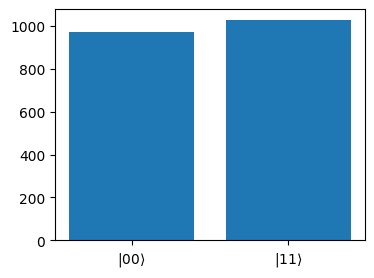

In [8]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(4, 3))
plt.bar([r'$|00\rangle$', r'$|11\rangle$'], counts.values());
plt.show()

## Statevector simulation with Aer

In [8]:
from pytket.extensions.qiskit import AerStateBackend

c = Circuit(2).H(0).CX(0, 1)    # Statevector simulation requires no measurements
rcj(c)

backend = AerStateBackend()
compiled_circuit = backend.get_compiled_circuit(c)
handle = backend.process_circuit(compiled_circuit)
result = backend.get_result(handle)
print(result.get_state())

[0.70710678+0.00000000e+00j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.70710678-4.32978028e-17j]


## Aer with a noise model

You can also use Aer to mimic the behaviour of a real device. ATOW, there are two principal ways of doing this:
1. Using pytket's `IBMQEmulatorBackend` class (which behaves in almost exactly the same way as the `IBMQBackend` class).
2.  Using Aer and fetching a noise model yourself from a particular device.

Behind the scenes, (1) uses Qiskit Runtime in the cloud, and can be much slower than (2), which runs locally. Option (2) also lets you run on a GPU (this requires `pip install qiskit-aer-gpu`, discussed [here](https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html)).

#### Using `IBMQEmulatorBackend`

In [9]:
from pytket.extensions.qiskit import IBMQEmulatorBackend

c = Circuit(2).H(0).CX(0, 1).measure_all()
rcj(c)

backend = IBMQEmulatorBackend('ibm_lagos')
compiled_circuit = backend.get_compiled_circuit(c)
handle = backend.process_circuit(compiled_circuit, n_shots=2000)
result = backend.get_result(handle)
counts = result.get_counts()
print(counts)

Counter({(0, 0): 968, (1, 1): 947, (1, 0): 44, (0, 1): 41})


#### Defining your own noise model
More details on the [building noise models page](https://qiskit.org/documentation/tutorials/simulators/3_building_noise_models.html).

Here, you give Aer a `NoiseModel` for a specific backend. This backend has to be imported _from `qiskit` directly_, not from `pytket`. You can then pass this to `pytket`'s `AerBackend`.

In [10]:
from qiskit import IBMQ
from qiskit_aer.noise import NoiseModel

# Load IBMQ account to access the IBMQ devices directly (without using pytket)
provider = IBMQ.load_account()

backend = provider.get_backend('ibm_lagos')
noise_model = NoiseModel.from_backend(backend)

# Pass the noise model to pytket's Aer backend
noisy_aer_backend = AerBackend(noise_model=noise_model)

ibmqfactory.load_account:WARNING:2023-04-26 17:05:05,651: Credentials are already in use. The existing account in the session will be replaced.


In [11]:
# Now we can run the circuit as before
c = Circuit(2).H(0).CX(0, 1).measure_all()
rcj(c)

compiled_circuit = noisy_aer_backend.get_compiled_circuit(c)
handle = noisy_aer_backend.process_circuit(compiled_circuit, n_shots=2000)
result = noisy_aer_backend.get_result(handle)
counts = result.get_counts()

print(counts)

Counter({(0, 0): 1002, (1, 1): 941, (1, 0): 33, (0, 1): 24})


Text(0.5, 1.0, 'Aer backend with noise model from IBM Lagos')

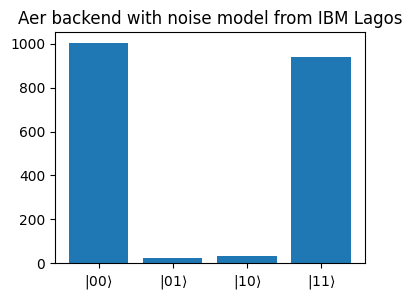

In [12]:
fig = plt.figure(figsize=(4, 3))
plt.bar([rf'$|{x[0]}{x[1]}\rangle$' for x in counts.keys()], counts.values());
plt.title(f"Aer backend with noise model from IBM Lagos")

## Using a real device

In [ ]:
from pytket.extensions.qiskit import IBMQBackend

c = Circuit(2).H(0).CX(0, 1).measure_all()
rcj(c)

backend = IBMQBackend('ibm_lagos')
compiled_circuit = backend.get_compiled_circuit(c)
handle = backend.process_circuit(compiled_circuit, n_shots=2000)
result = backend.get_result(handle)
counts = result.get_counts()

print(counts)

In [ ]:
fig = plt.figure(figsize=(4, 3))
plt.bar([rf'$|{x[0]}{x[1]}\rangle$' for x in counts.keys()], counts.values())
plt.title(f"Using IBM Lagos directly")

## Using Aer with Myqos

In [17]:
from pytket.extensions.myqos import Myqos, MyqosBackend, AerConfig

myqos = Myqos()
aer_config = AerConfig()

experiment = myqos.new_experiment('aer_test')
# Or if you have already created it:
# experiment = myqos.get_experiment_by_name('aer_test')

backend = MyqosBackend(aer_config, experiment=experiment)


Started using experiment with name: aer_test


In [20]:
c = Circuit(2).H(0).CX(0, 1).measure_all()

rcj(c)

compiled_circuit = backend.get_compiled_circuit(c)
handle = backend.process_circuit(compiled_circuit, n_shots=2000)
result = backend.get_result(handle)
counts = result.get_counts()

print(counts)

Counter({(0, 0): 1030, (1, 1): 970})


## Using a real device with Myqos

In [25]:
from pytket.extensions.myqos import Myqos, MyqosBackend, IBMQConfig

myqos = Myqos()
ibmq_config = IBMQConfig(backend_name='ibm_lagos', hub='partner-cqc', group='internal', project='qnlp')

experiment = myqos.new_experiment('ibmq_test')
# Or if you have already created it:
# experiment = myqos.get_experiment_by_name('ibmq_test')

backend = MyqosBackend(ibmq_config, experiment=experiment)


New experiment created: ibmq_test

Started using experiment with name: ibmq_test


In [ ]:
c = Circuit(2).H(0).CX(0, 1).measure_all()

rcj(c)

compiled_circuit = backend.get_compiled_circuit(c)
handle = backend.process_circuit(compiled_circuit, n_shots=2000)
result = backend.get_result(handle)
counts = result.get_counts()

print(counts)